###    cats and dogs after fchollet 
https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d

In [9]:
%load_ext autoreload
%autoreload 2

import numpy as np
import tools as t
import bottleneck_cnn as m
import hpband as hb
import model_tools as mt

# from tensorflow.keras import backend as K

print("hello")
# new info

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
hello


In [10]:
config = {'batch_size' : 16, 'lr' : 0.001, 'momentum' : 0.9,  'l2': 0.0008048349801333865, 'l1': 0.00016294967259595808}
bn = m.Bottleneck_CNN("MyMobileNet", img_width = 128, img_height = 128) 

2  classes detected under directory  data/train
training on  2000  training samples and  800  validation samples
callback writing Tensorboard log file
loading base model:  MyMobileNet
loading custom MyMobileNet
create layer using L1L2 regularisation
create layer using L1L2 regularisation
create layer using L1L2 regularisation
create layer using L1L2 regularisation
create layer using L1L2 regularisation
create layer using L1L2 regularisation
create layer using L1L2 regularisation
create layer using L1L2 regularisation
create layer using L1L2 regularisation
create layer using L1L2 regularisation
create layer using L1L2 regularisation
create layer using L1L2 regularisation
create layer using L1L2 regularisation
load weights
MyMobileNet loaded
built top_model
built full model (base plus top)


In [6]:
mt.print_layers(bn.top_model)

0 topmodel_input       0 weights, trainable True
1 flatten       0 weights, trainable True
2 dense_gaga       4194560 weights, trainable True
3 dropout_1       0 weights, trainable True
4 dense_softmax       514 weights, trainable True
4195074 weights in 4 layers


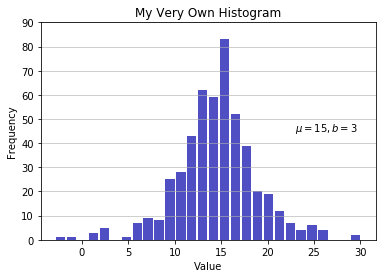

In [15]:
my_layer = bn.top_model.get_layer('dense_gaga')
mt.plot_weight_histogram(my_layer)

In [17]:
print(my_layer.get_weights())

[array([[-0.00093375,  0.01478343,  0.00157425, ...,  0.00448854,
        -0.00353681,  0.00162463],
       [-0.01560048,  0.01748003, -0.00445504, ..., -0.0156729 ,
        -0.0048034 , -0.01850555],
       [-0.01304333,  0.00195194, -0.0084791 , ...,  0.00169972,
        -0.01220624,  0.015982  ],
       ...,
       [ 0.00717876, -0.00331515,  0.00917069, ...,  0.0173233 ,
        -0.01064907,  0.00949428],
       [ 0.00337207,  0.00491851, -0.01374121, ...,  0.00437879,
         0.00107028, -0.00028301],
       [ 0.01104398, -0.00749309, -0.01885121, ...,  0.01618056,
         0.00676831,  0.01521644]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [3]:
history = bn.fit_top_model(config, epochs=2, reset_weights = False)

run save_bottleneck_features() first - now load last stored labels
now compile top model
fit top model on training data with shape:  (2000, 4, 4, 1024)
Train on 2000 samples, validate on 800 samples
Epoch 1/2
2000/2000 [==============================] - 38s 19ms/step - loss: 0.2960 - acc: 0.9220 - val_loss: 0.0969 - val_acc: 0.9650
Epoch 2/2
2000/2000 [==============================] - 42s 21ms/step - loss: 0.0481 - acc: 0.9825 - val_loss: 0.0946 - val_acc: 0.9675
weights saved as  top_weights.h5


In [38]:
bn.save_bottleneck_features(batch_size=16)

now predict data from  data/train
Found 2000 images belonging to 2 classes.
125/125 [==============================] - 61s 492ms/step
features saved of  2000 samples from data directory: data/train into file  bottleneck_features_train.npy
saving labels in one hot format
now predict data from  data/validation
Found 800 images belonging to 2 classes.
50/50 [==============================] - 22s 449ms/step
features saved of  800 samples from data directory: data/validation into file  bottleneck_features_valid.npy
saving labels in one hot format


In [39]:
x = bn.train_labels
y = bn.valid_labels
print(y)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


run save_bottleneck_features() first - now load last stored labels
now compile top model
fit top model on training data with shape:  (2000, 4, 4, 1024)
Train on 2000 samples, validate on 800 samples
Epoch 1/3
1968/2000 [============================>.] - ETA: 0s - loss: 0.2936 - acc: 0.9319

InvalidArgumentError: You must feed a value for placeholder tensor 'flatten_1_input' with dtype float and shape [?,4,4,1024]
	 [[{{node flatten_1_input}} = Placeholder[dtype=DT_FLOAT, shape=[?,4,4,1024], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

In [3]:
hist = bn.fit_base_model(config, 
                            load_weights = False, save_weights = True, 
                            freeze_blocks = 1, 
                            epochs = 1)

max frozen layer is  conv_pw_12_relu with index 80 out of  87
full model built and compiled
Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
fit model on  2000  training samples,  800  validation samples
Epoch 1/1
124/125 [============================>.] - ETA: 1s - loss: 112.3603 - acc: 0.8977

InvalidArgumentError: You must feed a value for placeholder tensor 'topmodel_input' with dtype float and shape [?,4,4,1024]
	 [[{{node topmodel_input}} = Placeholder[dtype=DT_FLOAT, shape=[?,4,4,1024], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

In [19]:
preds = bn.predict_test(test_dir = 'data/test', load_weights = True, max_test_samples = 128)

weights of full model loading from  full_weights.h5
gaga
Found 500 images belonging to 2 classes.
now predict
8/8 [==============================] - 1s 82ms/step
runtime for  128 samples:  0.657357931137085 0.005135608837008476 per sample


In [13]:
print(preds)

[[8.03373475e-03 9.91966248e-01]
 [9.99975920e-01 2.40302688e-05]
 [9.95112717e-01 4.88731172e-03]
 [1.00000000e+00 1.13963483e-09]
 [9.65760555e-04 9.99034286e-01]
 [9.99992251e-01 7.78657613e-06]
 [2.18144038e-07 9.99999762e-01]
 [1.00000000e+00 8.86590912e-10]
 [1.24982193e-06 9.99998808e-01]
 [1.00000000e+00 1.86668708e-10]
 [4.03509548e-05 9.99959588e-01]
 [9.99999881e-01 1.02295715e-07]
 [1.48004042e-02 9.85199571e-01]
 [1.00000000e+00 9.13825737e-10]
 [5.01237903e-03 9.94987607e-01]
 [1.16631793e-09 1.00000000e+00]
 [5.16146201e-08 1.00000000e+00]
 [1.08207721e-04 9.99891758e-01]
 [9.99999404e-01 5.38188317e-07]
 [1.00000000e+00 1.50611086e-11]
 [1.00000000e+00 2.80004144e-08]
 [1.78363777e-08 1.00000000e+00]
 [1.00000000e+00 4.02590374e-12]
 [5.06451964e-11 1.00000000e+00]
 [6.16154522e-02 9.38384533e-01]
 [9.99999762e-01 2.92358664e-07]
 [1.19494402e-03 9.98805046e-01]
 [6.38258030e-07 9.99999404e-01]
 [2.60786176e-01 7.39213824e-01]
 [1.00000000e+00 1.14771630e-10]
 [7.294129

In [18]:
t = 0.02
for i in range(preds.shape[0]):
    if preds[i][0] > t and preds[i][1] > t:
        print(preds[i])
    

[0.06161545 0.93838453]
[0.26078618 0.7392138 ]
[0.9756763  0.02432371]
[0.56476414 0.43523592]
[0.4849917 0.5150083]


In [78]:
preds[0][0] + preds[0][1]


0.6852218

In [20]:
pred = bn.predict_image(img_path = 'data/test/test/135.jpg', load_weights = True)
print(pred)

weights of full model loading from  full_weights.h5
runtime for one sample  0.005748748779296875
[[9.9997425e-01 2.5700250e-05]]


In [11]:
pred[0][0] + pred[0][1]

1.0

In [17]:
res = hb.test_MyWorker()

{'lr': 0.16239778544730754, 'batch_size': 29, 'momentum': 0.5127558191244451}
worker computes  {'lr': 0.16239778544730754, 'batch_size': 29, 'momentum': 0.5127558191244451}
2  classes detected under directory  data/train
training on  2000  training samples and  800  validation samples
getting labels from data directories
Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
loading base model:  MobileNet
built top_model
now train on epochs:  1
clear Tensorflow session


AttributeError: 'Bottleneck_CNN' object has no attribute 'train_top_model'

In [ ]:
rest = hb.optimize()

successive halfing in n_iterations 2
worker computes  {'batch_size': 16, 'lr': 0.006783165993404622}
2  classes detected under directory  data/train
training on  0  training samples and  0  validation samples
getting labels from data directories
Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
loading base model:  MobileNet
built top_model
now train on epochs:  1
now compile top model
reset weights
fit top model on training data with shape:  (2000, 4, 4, 1024)
Train on 2000 samples, validate on 800 samples
Epoch 1/1
2000/2000 [==============================] - 6s 3ms/step - loss: 0.7474 - acc: 0.6645 - val_loss: 0.4041 - val_acc: 0.8562
weights saved as  top_weights.h5
clear Tensorflow session
worker computes  {'batch_size': 49, 'lr': 0.026438827946709993}
2  classes detected under directory  data/train
training on  0  training samples and  0  validation samples
getting labels from data directories
Found 2000 images belonging to 2 classes.
Found 800 im

Epoch 2/5
2000/2000 [==============================] - 7s 4ms/step - loss: 0.5510 - acc: 0.7565 - val_loss: 0.3661 - val_acc: 0.8975
Epoch 3/5
2000/2000 [==============================] - 7s 4ms/step - loss: 0.4411 - acc: 0.8350 - val_loss: 0.2687 - val_acc: 0.9287
Epoch 4/5
2000/2000 [==============================] - 6s 3ms/step - loss: 0.3637 - acc: 0.8730 - val_loss: 0.1985 - val_acc: 0.9463
Epoch 5/5
2000/2000 [==============================] - 7s 3ms/step - loss: 0.2953 - acc: 0.8855 - val_loss: 0.1609 - val_acc: 0.9513
weights saved as  top_weights.h5
clear Tensorflow session
worker computes  {'batch_size': 23, 'lr': 0.41932140178392746}
2  classes detected under directory  data/train
training on  0  training samples and  0  validation samples
getting labels from data directories
Found 2000 images belonging to 2 classes.


In [3]:
res = rest
print(res)
id2config = res.get_id2config_mapping()
print(id2config)
incumbent = res.get_incumbent_id()
print("incumbent", incumbent)

print('Best found configuration:', id2config[incumbent]['config'])
print('A total of %i unique configurations where sampled.' % len(id2config.keys()))
print('A total of %i runs where executed.' % len(res.get_all_runs()))
print('Total budget corresponds to %.1f full function evaluations.'%(sum([r.budget for r in res.get_all_runs()])/max_budget))

return(id2config[incumbent]['config'])

{'lr': 0.01067176180015007, 'batch_size': 17}


AttributeError: 'dict' object has no attribute 'get_id2config_mapping'

In [20]:
hb.test_BOHB()

compute now with config {'lr': 0.006322083980293625, 'batch_size': 29}
compute now with config {'lr': 0.009539146393332459, 'batch_size': 22}
compute now with config {'lr': 0.28959331094699, 'batch_size': 27}
compute now with config {'lr': 0.0059911852576477985, 'batch_size': 22}
compute now with config {'lr': 0.003688758885089022, 'batch_size': 21}
Best found configuration: {'lr': 0.003688758885089022, 'batch_size': 21}
A total of 5 unique configurations where sampled.
A total of 5 runs where executed.
Total budget corresponds to 5.0 full function evaluations.


In [8]:
bn = m.Bottleneck_CNN("MobileNet", img_width = 128, img_height = 128)

2  classes detected under directory  data/train
training on  0  training samples and  0  validation samples
getting labels from data directories
Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
loading base model:  MobileNet
built top_model


In [12]:
config = {'batch_size' : 16, 'lr' : 0.001, 'momentum' : 0,9}
epochs = 2
history = bn.fit_top_model(config, epochs, reset_weights = False)

2000/2000 [==============================] - 3s 1ms/step - loss: 0.1541 - acc: 0.9405 - val_loss: 0.1067 - val_acc: 0.9600
Epoch 29/50
1968/2000 [============================>.] - ETA: 0s - loss: 0.1551 - acc: 0.9426Train on 2000 samples, validate on 800 samples
Epoch 1/2
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1535 - acc: 0.9430 - val_loss: 0.1050 - val_acc: 0.9613
Epoch 30/50
  41/2000 [..............................] - ETA: 1:33 - loss: 0.1246 - acc: 0.951

InvalidArgumentError: Tensor flatten_input_1:0, specified in either feed_devices or fetch_devices was not found in the Graph

2000/2000 [==============================] - 4s 2ms/step - loss: 0.1358 - acc: 0.9490 - val_loss: 0.1037 - val_acc: 0.9625
Epoch 31/50
2000/2000 [==============================] - 2s 1ms/step - loss: 0.1448 - acc: 0.9435 - val_loss: 0.1027 - val_acc: 0.9625
Epoch 32/50
2000/2000 [==============================] - 2s 1ms/step - loss: 0.1315 - acc: 0.9490 - val_loss: 0.1016 - val_acc: 0.9625
Epoch 33/50
2000/2000 [==============================] - 3s 1ms/step - loss: 0.1293 - acc: 0.9485 - val_loss: 0.1008 - val_acc: 0.9625
Epoch 34/50
2000/2000 [==============================] - 2s 1ms/step - loss: 0.1343 - acc: 0.9505 - val_loss: 0.0998 - val_acc: 0.9625
Epoch 35/50
2000/2000 [==============================] - 2s 1ms/step - loss: 0.1206 - acc: 0.9530 - val_loss: 0.0991 - val_acc: 0.9625
Epoch 36/50
2000/2000 [==============================] - 3s 1ms/step - loss: 0.1338 - acc: 0.9500 - val_loss: 0.0984 - val_acc: 0.9625
Epoch 37/50
2000/2000 [==============================] - 3s 1ms/ste

In [7]:
bn.save_bottleneck_features(objbn.train_top_model(batch_size = 16, epochs = 2, reset_weights = False))

now predict data from  data/train
Found 2000 images belonging to 2 classes.
125/125 [==============================] - 55s 444ms/step
features saved of  2000 samples from data directory: data/train into file  bottleneck_features_train.npy
now predict data from  data/validation
Found 800 images belonging to 2 classes.
50/50 [==============================] - 21s 426ms/step
features saved of  800 samples from data directory: data/validation into file  bottleneck_features_valid.npy


In [10]:
hist = bn.fit_base_model(config, 
                            load_weights = False, save_weights = True, 
                            freeze_blocks = 1, 
                            epochs = 2)

max frozen layer is  conv_pw_12_relu with index 80 out of  87
full model built and compiled
Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
fit model on  2000  training samples,  800  validation samples
steps_per_epoch 125
validation_steps 50
Epoch 1/2


StopIteration: object of type 'float' has no len()

In [5]:
best_config = hb.optimize()

no2
worker computes  {'lr': 0.001032941775885204, 'batch_size': 34}
dummy obj.
runtime in compute 6.341934204101562e-05
clear Tensorflow session
worker computes  {'lr': 0.4214587107417539, 'batch_size': 22}
dummy obj.
runtime in compute 0.00012731552124023438
clear Tensorflow session
worker computes  {'lr': 0.0014326228087880892, 'batch_size': 32}
dummy obj.
runtime in compute 0.00014734268188476562
clear Tensorflow session
worker computes  {'lr': 0.001032941775885204, 'batch_size': 34}
dummy obj.
runtime in compute 6.556510925292969e-05
clear Tensorflow session
worker computes  {'lr': 0.060888898016161055, 'batch_size': 18}
dummy obj.
runtime in compute 6.4849853515625e-05
clear Tensorflow session
worker computes  {'lr': 0.004873783812189556, 'batch_size': 23}
dummy obj.
runtime in compute 0.0002930164337158203
clear Tensorflow session
worker computes  {'lr': 0.004953109977308495, 'batch_size': 28}
dummy obj.
runtime in compute 0.00015020370483398438
clear Tensorflow session
worker co

In [3]:
config = {'batch_size' : 16, 'lr' : 1e-5, 'momentum' : 0,9}
bn.fit_base_model(config, load_weights = True, save_weights = True, 
                        freeze_up_to = None, epochs = 1)

max frozen layer is  conv_pw_12_relu with index 80
full model built and compiled
weights of full model loading from  full_weights.h5
Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
fit model on  2000  training samples,  800  validation samples
Epoch 1/1
125/125 [==============================] - 105s 843ms/step - loss: 0.2551 - acc: 0.9030 - val_loss: 0.0981 - val_acc: 0.9663
weights of full model saving as  full_weights.h5
val_acc :  [0.96625]
acc:  [0.903]


In [8]:
bn.fit_base_model(load_weights = False, save_weights = True, 
                              freeze_blocks = 20, 
                              batch_size = 16, epochs = 1)

max frozen layer is  conv_pw_1_relu with index 10 out of  87
Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
fit model on  2000  training samples,  800  validation samples
Epoch 1/1
125/125 [==============================] - 119s 954ms/step - loss: 0.1947 - acc: 0.9260 - val_loss: 0.0826 - val_acc: 0.9712
weights of full model saving as  full_weights.h5
val_acc :  [0.97125]
acc:  [0.926]


In [7]:
bn.fit_base_model(load_weights = False, save_weights = False, 
                              freeze_up_to = None, 
                              batch_size = 16, epochs = 1)

max frozen layer is  conv_pw_12_relu with index 80
full model built and compiled
Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
fit model on  2000  training samples,  800  validation samples
Epoch 1/1
125/125 [==============================] - 123s 988ms/step - loss: 0.2344 - acc: 0.9055 - val_loss: 0.1019 - val_acc: 0.9613
val_acc :  [0.96125]
acc:  [0.9055]


In [39]:
base_model = m.load_base_model("MobileNet", 128, 128)
last_layer = base_model.layers[-1]
print("last_layer.name", last_layer.name)
print("shape", base_model.layers[-1].output.shape[1:])


AttributeError: module 'models_class' has no attribute 'load_base_model'

In [ ]:
# pass training and validation data through pretrained base cnn without top, collect output features, 
# and train a small MLP (top_model) on them
m.fit_bottleneck_top(
    train_dir = 'data/train', valid_dir = 'data/validation', 
    top_weights_path = 'MobileNet_top_weights.h5', 
    model_type = 'MobileNet',
    batch_size = 16, epochs = 50,
    img_width = 128, img_height = 128)

2000  training files found,  800  validation files found
loading model:  MobileNet
now predict data from  data/train
Found 2000 images belonging to 2 classes.
125/125 [==============================] - 57s 458ms/step
features saved of  2000 samples from data directory: data/train into file  bottleneck_features_train.npy
loading model:  MobileNet
now predict data from  data/validation
Found 800 images belonging to 2 classes.
50/50 [==============================] - 23s 467ms/step
features saved of  800 samples from data directory: data/validation into file  bottleneck_features_valid.npy
Found 2000 images belonging to 2 classes.
len labels 2000
Found 800 images belonging to 2 classes.
len labels 800
2000  train_labels
800  validation_labels
shape train data:  (4, 4, 1024)
built top_model
compile model
fit model
Train on 2000 samples, validate on 800 samples
Epoch 1/50
2000/2000 [==============================] - 8s 4ms/step - loss: 0.4663 - acc: 0.8040 - val_loss: 0.1351 - val_acc: 0.943

In [2]:
# Finetuning: connect base_cnn with top_model, load weights of topmodel, 
# freeze most layers of base-model, leave only topmost trainable
# optionally save and / or store weights of full model for further training
m.fit_bottleneck_bottom(model_type = 'NASNetMobile',
                        top_weights_path = 'NASNetMobile_top_weights.h5',
                        # load_weights_path = 'MobileNetV2_full_weights.h5',
                        save_weights_path = 'NASNetMobile_full_weights.h5',
                        batch_size = 16, epochs = 2,
                        img_width = 128, img_height = 128)

loading model:  NASNetMobile
Base_Model loaded. NASNet
max frozen layer is  normal_concat_11 with index 722
built top_model
Full Model built
full model compiled
Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
fit model on  2000  training samples,  800  validation samples
Epoch 1/2
125/125 [==============================] - 30s 239ms/step - loss: 0.4558 - acc: 0.7870 - val_loss: 0.1429 - val_acc: 0.9475
Epoch 2/2
125/125 [==============================] - 19s 148ms/step - loss: 0.4119 - acc: 0.8005 - val_loss: 0.1327 - val_acc: 0.9525
weights of full model saving as  NASNetMobile_full_weights.h5
val_acc :  [0.9475, 0.9525]
acc:  [0.787, 0.8005]


In [13]:
# retrain with deeper únfreezing / making further block trainable
m.fit_bottleneck_bottom(model_type = 'NASNetMobile',
                        freeze_up_to = 'conv_pw_11_relu',    # deeper unfreezing than default 'block_14_add'
                        top_weights_path = 'NASNetMobile_top_weights.h5',
                        load_weights_path = 'NASNetMobile_full_weights.h5',
                        save_weights_path = 'NASNetMobile_full_weights.h5',
                        batch_size = 16, epochs = 5,
                        img_width = 128, img_height = 128)

loading model:  MobileNet
Base_Model loaded. mobilenet_1.00_128
max frozen layer is  conv_pw_11_relu with index 73
built top_model
Full Model built
full model compiled
weights of full model loaded from  MobileNet_full_weights.h5
Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
fit model on  2000  training samples,  800  validation samples
Epoch 1/5
125/125 [==============================] - 24s 193ms/step - loss: 0.1026 - acc: 0.9625 - val_loss: 0.0947 - val_acc: 0.9625
Epoch 2/5
125/125 [==============================] - 18s 147ms/step - loss: 0.1098 - acc: 0.9575 - val_loss: 0.0898 - val_acc: 0.9587
Epoch 3/5
125/125 [==============================] - 18s 146ms/step - loss: 0.0948 - acc: 0.9620 - val_loss: 0.0798 - val_acc: 0.9650
Epoch 4/5
125/125 [==============================] - 18s 146ms/step - loss: 0.0884 - acc: 0.9665 - val_loss: 0.0670 - val_acc: 0.9725
Epoch 5/5
125/125 [==============================] - 18s 147ms/step - loss: 0.0748 - acc:

In [4]:
# load data from Azure storage incrementally (if not already loaded)
t.get_data_from_azure(source_dir = 'catsanddogs/fcollet_data/', 
                      target_dir = './data/')

make dir ./data/
make dir ./data/test
target_path ./data/test/1.jpg
target_path ./data/test/10.jpg
target_path ./data/test/100.jpg
target_path ./data/test/101.jpg
target_path ./data/test/102.jpg
target_path ./data/test/103.jpg
target_path ./data/test/104.jpg
target_path ./data/test/105.jpg
target_path ./data/test/106.jpg
target_path ./data/test/107.jpg
target_path ./data/test/108.jpg
target_path ./data/test/109.jpg
target_path ./data/test/11.jpg
target_path ./data/test/110.jpg
target_path ./data/test/111.jpg
target_path ./data/test/112.jpg
target_path ./data/test/113.jpg
target_path ./data/test/114.jpg
target_path ./data/test/115.jpg
target_path ./data/test/116.jpg
target_path ./data/test/117.jpg
target_path ./data/test/118.jpg
target_path ./data/test/119.jpg
target_path ./data/test/12.jpg
target_path ./data/test/120.jpg
target_path ./data/test/121.jpg
target_path ./data/test/122.jpg
target_path ./data/test/123.jpg
target_path ./data/test/124.jpg
target_path ./data/test/125.jpg
target_

target_path ./data/test/357.jpg
target_path ./data/test/358.jpg
target_path ./data/test/359.jpg
target_path ./data/test/36.jpg
target_path ./data/test/360.jpg
target_path ./data/test/361.jpg
target_path ./data/test/362.jpg
target_path ./data/test/363.jpg
target_path ./data/test/364.jpg
target_path ./data/test/365.jpg
target_path ./data/test/366.jpg
target_path ./data/test/367.jpg
target_path ./data/test/368.jpg
target_path ./data/test/369.jpg
target_path ./data/test/37.jpg
target_path ./data/test/370.jpg
target_path ./data/test/371.jpg
target_path ./data/test/372.jpg
target_path ./data/test/373.jpg
target_path ./data/test/374.jpg
target_path ./data/test/375.jpg
target_path ./data/test/376.jpg
target_path ./data/test/377.jpg
target_path ./data/test/378.jpg
target_path ./data/test/379.jpg
target_path ./data/test/38.jpg
target_path ./data/test/380.jpg
target_path ./data/test/381.jpg
target_path ./data/test/382.jpg
target_path ./data/test/383.jpg
target_path ./data/test/384.jpg
target_path

target_path ./data/train/cats/cat.219.jpg
target_path ./data/train/cats/cat.22.jpg
target_path ./data/train/cats/cat.220.jpg
target_path ./data/train/cats/cat.221.jpg
target_path ./data/train/cats/cat.222.jpg
target_path ./data/train/cats/cat.223.jpg
target_path ./data/train/cats/cat.224.jpg
target_path ./data/train/cats/cat.225.jpg
target_path ./data/train/cats/cat.226.jpg
target_path ./data/train/cats/cat.227.jpg
target_path ./data/train/cats/cat.228.jpg
target_path ./data/train/cats/cat.229.jpg
target_path ./data/train/cats/cat.23.jpg
target_path ./data/train/cats/cat.230.jpg
target_path ./data/train/cats/cat.231.jpg
target_path ./data/train/cats/cat.232.jpg
target_path ./data/train/cats/cat.233.jpg
target_path ./data/train/cats/cat.234.jpg
target_path ./data/train/cats/cat.235.jpg
target_path ./data/train/cats/cat.236.jpg
target_path ./data/train/cats/cat.237.jpg
target_path ./data/train/cats/cat.238.jpg
target_path ./data/train/cats/cat.239.jpg
target_path ./data/train/cats/cat.24

target_path ./data/train/cats/cat.503.jpg
target_path ./data/train/cats/cat.504.jpg
target_path ./data/train/cats/cat.505.jpg
target_path ./data/train/cats/cat.506.jpg
target_path ./data/train/cats/cat.507.jpg
target_path ./data/train/cats/cat.508.jpg
target_path ./data/train/cats/cat.509.jpg
target_path ./data/train/cats/cat.51.jpg
target_path ./data/train/cats/cat.510.jpg
target_path ./data/train/cats/cat.511.jpg
target_path ./data/train/cats/cat.512.jpg
target_path ./data/train/cats/cat.513.jpg
target_path ./data/train/cats/cat.514.jpg
target_path ./data/train/cats/cat.515.jpg
target_path ./data/train/cats/cat.516.jpg
target_path ./data/train/cats/cat.517.jpg
target_path ./data/train/cats/cat.518.jpg
target_path ./data/train/cats/cat.519.jpg
target_path ./data/train/cats/cat.52.jpg
target_path ./data/train/cats/cat.520.jpg
target_path ./data/train/cats/cat.521.jpg
target_path ./data/train/cats/cat.522.jpg
target_path ./data/train/cats/cat.523.jpg
target_path ./data/train/cats/cat.52

target_path ./data/train/cats/cat.823.jpg
target_path ./data/train/cats/cat.824.jpg
target_path ./data/train/cats/cat.825.jpg
target_path ./data/train/cats/cat.826.jpg
target_path ./data/train/cats/cat.827.jpg
target_path ./data/train/cats/cat.828.jpg
target_path ./data/train/cats/cat.829.jpg
target_path ./data/train/cats/cat.83.jpg
target_path ./data/train/cats/cat.830.jpg
target_path ./data/train/cats/cat.831.jpg
target_path ./data/train/cats/cat.832.jpg
target_path ./data/train/cats/cat.833.jpg
target_path ./data/train/cats/cat.834.jpg
target_path ./data/train/cats/cat.835.jpg
target_path ./data/train/cats/cat.836.jpg
target_path ./data/train/cats/cat.837.jpg
target_path ./data/train/cats/cat.838.jpg
target_path ./data/train/cats/cat.839.jpg
target_path ./data/train/cats/cat.84.jpg
target_path ./data/train/cats/cat.840.jpg
target_path ./data/train/cats/cat.841.jpg
target_path ./data/train/cats/cat.842.jpg
target_path ./data/train/cats/cat.843.jpg
target_path ./data/train/cats/cat.84

target_path ./data/train/dogs/dog.0.jpg
target_path ./data/train/dogs/dog.1.jpg
target_path ./data/train/dogs/dog.10.jpg
target_path ./data/train/dogs/dog.100.jpg
target_path ./data/train/dogs/dog.101.jpg
target_path ./data/train/dogs/dog.102.jpg
target_path ./data/train/dogs/dog.103.jpg
target_path ./data/train/dogs/dog.104.jpg
target_path ./data/train/dogs/dog.105.jpg
target_path ./data/train/dogs/dog.106.jpg
target_path ./data/train/dogs/dog.107.jpg
target_path ./data/train/dogs/dog.108.jpg
target_path ./data/train/dogs/dog.109.jpg
target_path ./data/train/dogs/dog.11.jpg
target_path ./data/train/dogs/dog.110.jpg
target_path ./data/train/dogs/dog.111.jpg
target_path ./data/train/dogs/dog.112.jpg
target_path ./data/train/dogs/dog.113.jpg
target_path ./data/train/dogs/dog.114.jpg
target_path ./data/train/dogs/dog.115.jpg
target_path ./data/train/dogs/dog.116.jpg
target_path ./data/train/dogs/dog.117.jpg
target_path ./data/train/dogs/dog.118.jpg
target_path ./data/train/dogs/dog.119.jp

target_path ./data/train/dogs/dog.403.jpg
target_path ./data/train/dogs/dog.404.jpg
target_path ./data/train/dogs/dog.405.jpg
target_path ./data/train/dogs/dog.406.jpg
target_path ./data/train/dogs/dog.407.jpg
target_path ./data/train/dogs/dog.408.jpg
target_path ./data/train/dogs/dog.409.jpg
target_path ./data/train/dogs/dog.41.jpg
target_path ./data/train/dogs/dog.410.jpg
target_path ./data/train/dogs/dog.411.jpg
target_path ./data/train/dogs/dog.412.jpg
target_path ./data/train/dogs/dog.413.jpg
target_path ./data/train/dogs/dog.414.jpg
target_path ./data/train/dogs/dog.415.jpg
target_path ./data/train/dogs/dog.416.jpg
target_path ./data/train/dogs/dog.417.jpg
target_path ./data/train/dogs/dog.418.jpg
target_path ./data/train/dogs/dog.419.jpg
target_path ./data/train/dogs/dog.42.jpg
target_path ./data/train/dogs/dog.420.jpg
target_path ./data/train/dogs/dog.421.jpg
target_path ./data/train/dogs/dog.422.jpg
target_path ./data/train/dogs/dog.423.jpg
target_path ./data/train/dogs/dog.42

target_path ./data/train/dogs/dog.687.jpg
target_path ./data/train/dogs/dog.688.jpg
target_path ./data/train/dogs/dog.689.jpg
target_path ./data/train/dogs/dog.69.jpg
target_path ./data/train/dogs/dog.690.jpg
target_path ./data/train/dogs/dog.691.jpg
target_path ./data/train/dogs/dog.692.jpg
target_path ./data/train/dogs/dog.693.jpg
target_path ./data/train/dogs/dog.694.jpg
target_path ./data/train/dogs/dog.695.jpg
target_path ./data/train/dogs/dog.696.jpg
target_path ./data/train/dogs/dog.697.jpg
target_path ./data/train/dogs/dog.698.jpg
target_path ./data/train/dogs/dog.699.jpg
target_path ./data/train/dogs/dog.7.jpg
target_path ./data/train/dogs/dog.70.jpg
target_path ./data/train/dogs/dog.700.jpg
target_path ./data/train/dogs/dog.701.jpg
target_path ./data/train/dogs/dog.702.jpg
target_path ./data/train/dogs/dog.703.jpg
target_path ./data/train/dogs/dog.704.jpg
target_path ./data/train/dogs/dog.705.jpg
target_path ./data/train/dogs/dog.706.jpg
target_path ./data/train/dogs/dog.707.

target_path ./data/train/dogs/dog.949.jpg
target_path ./data/train/dogs/dog.95.jpg
target_path ./data/train/dogs/dog.950.jpg
target_path ./data/train/dogs/dog.951.jpg
target_path ./data/train/dogs/dog.952.jpg
target_path ./data/train/dogs/dog.953.jpg
target_path ./data/train/dogs/dog.954.jpg
target_path ./data/train/dogs/dog.955.jpg
target_path ./data/train/dogs/dog.956.jpg
target_path ./data/train/dogs/dog.957.jpg
target_path ./data/train/dogs/dog.958.jpg
target_path ./data/train/dogs/dog.959.jpg
target_path ./data/train/dogs/dog.96.jpg
target_path ./data/train/dogs/dog.960.jpg
target_path ./data/train/dogs/dog.961.jpg
target_path ./data/train/dogs/dog.962.jpg
target_path ./data/train/dogs/dog.963.jpg
target_path ./data/train/dogs/dog.964.jpg
target_path ./data/train/dogs/dog.965.jpg
target_path ./data/train/dogs/dog.966.jpg
target_path ./data/train/dogs/dog.967.jpg
target_path ./data/train/dogs/dog.968.jpg
target_path ./data/train/dogs/dog.969.jpg
target_path ./data/train/dogs/dog.97

target_path ./data/validation/cats/cat.1177.jpg
target_path ./data/validation/cats/cat.1178.jpg
target_path ./data/validation/cats/cat.1179.jpg
target_path ./data/validation/cats/cat.1180.jpg
target_path ./data/validation/cats/cat.1181.jpg
target_path ./data/validation/cats/cat.1182.jpg
target_path ./data/validation/cats/cat.1183.jpg
target_path ./data/validation/cats/cat.1184.jpg
target_path ./data/validation/cats/cat.1185.jpg
target_path ./data/validation/cats/cat.1186.jpg
target_path ./data/validation/cats/cat.1187.jpg
target_path ./data/validation/cats/cat.1188.jpg
target_path ./data/validation/cats/cat.1189.jpg
target_path ./data/validation/cats/cat.1190.jpg
target_path ./data/validation/cats/cat.1191.jpg
target_path ./data/validation/cats/cat.1192.jpg
target_path ./data/validation/cats/cat.1193.jpg
target_path ./data/validation/cats/cat.1194.jpg
target_path ./data/validation/cats/cat.1195.jpg
target_path ./data/validation/cats/cat.1196.jpg
target_path ./data/validation/cats/cat.1

target_path ./data/validation/dogs/dog.1000.jpg
target_path ./data/validation/dogs/dog.1001.jpg
target_path ./data/validation/dogs/dog.1002.jpg
target_path ./data/validation/dogs/dog.1003.jpg
target_path ./data/validation/dogs/dog.1004.jpg
target_path ./data/validation/dogs/dog.1005.jpg
target_path ./data/validation/dogs/dog.1006.jpg
target_path ./data/validation/dogs/dog.1007.jpg
target_path ./data/validation/dogs/dog.1008.jpg
target_path ./data/validation/dogs/dog.1009.jpg
target_path ./data/validation/dogs/dog.1010.jpg
target_path ./data/validation/dogs/dog.1011.jpg
target_path ./data/validation/dogs/dog.1012.jpg
target_path ./data/validation/dogs/dog.1013.jpg
target_path ./data/validation/dogs/dog.1014.jpg
target_path ./data/validation/dogs/dog.1015.jpg
target_path ./data/validation/dogs/dog.1016.jpg
target_path ./data/validation/dogs/dog.1017.jpg
target_path ./data/validation/dogs/dog.1018.jpg
target_path ./data/validation/dogs/dog.1019.jpg
target_path ./data/validation/dogs/dog.1

target_path ./data/validation/dogs/dog.1309.jpg
target_path ./data/validation/dogs/dog.1310.jpg
target_path ./data/validation/dogs/dog.1311.jpg
target_path ./data/validation/dogs/dog.1312.jpg
target_path ./data/validation/dogs/dog.1313.jpg
target_path ./data/validation/dogs/dog.1314.jpg
target_path ./data/validation/dogs/dog.1315.jpg
target_path ./data/validation/dogs/dog.1316.jpg
target_path ./data/validation/dogs/dog.1317.jpg
target_path ./data/validation/dogs/dog.1318.jpg
target_path ./data/validation/dogs/dog.1319.jpg
target_path ./data/validation/dogs/dog.1320.jpg
target_path ./data/validation/dogs/dog.1321.jpg
target_path ./data/validation/dogs/dog.1322.jpg
target_path ./data/validation/dogs/dog.1323.jpg
target_path ./data/validation/dogs/dog.1324.jpg
target_path ./data/validation/dogs/dog.1325.jpg
target_path ./data/validation/dogs/dog.1326.jpg
target_path ./data/validation/dogs/dog.1327.jpg
target_path ./data/validation/dogs/dog.1328.jpg
target_path ./data/validation/dogs/dog.1

In [4]:
# inspect layers of model, after unfreezing
base_model = m.load_base_model("MobileNetV2", 128, 128)
m.freeze_bottom_layers(base_model)
m.print_layers(base_model)


loading model:  MobileNetV2
9412608/9406464 [==============================] - 2s 0us/step
mobilenetv2_1.00_128
0 input_5 , layer.trainable True
1 Conv1_pad , layer.trainable True
2 Conv1 , layer.trainable True
3 bn_Conv1 , layer.trainable True
4 Conv1_relu , layer.trainable True
5 expanded_conv_depthwise , layer.trainable True
6 expanded_conv_depthwise_BN , layer.trainable True
7 expanded_conv_depthwise_relu , layer.trainable True
8 expanded_conv_project , layer.trainable True
9 expanded_conv_project_BN , layer.trainable True
10 block_1_expand , layer.trainable True
11 block_1_expand_BN , layer.trainable True
12 block_1_expand_relu , layer.trainable True
13 block_1_pad , layer.trainable True
14 block_1_depthwise , layer.trainable True
15 block_1_depthwise_BN , layer.trainable True
16 block_1_depthwise_relu , layer.trainable True
17 block_1_project , layer.trainable True
18 block_1_project_BN , layer.trainable True
19 block_2_expand , layer.trainable True
20 block_2_expand_BN , layer.t

In [31]:
# plot model topology into png file, for determining appropriate bottlenecks for unfreezing
plot_model_topology(bn.base_model)

0 input_8 , layer.trainable True
1 conv1_pad , layer.trainable True
2 conv1 , layer.trainable True
3 conv1_bn , layer.trainable True
4 conv1_relu , layer.trainable True
5 conv_dw_1 , layer.trainable True
6 conv_dw_1_bn , layer.trainable True
7 conv_dw_1_relu , layer.trainable True
8 conv_pw_1 , layer.trainable True
9 conv_pw_1_bn , layer.trainable True
10 conv_pw_1_relu , layer.trainable True
11 conv_pad_2 , layer.trainable True
12 conv_dw_2 , layer.trainable True
13 conv_dw_2_bn , layer.trainable True
14 conv_dw_2_relu , layer.trainable True
15 conv_pw_2 , layer.trainable True
16 conv_pw_2_bn , layer.trainable True
17 conv_pw_2_relu , layer.trainable True
18 conv_dw_3 , layer.trainable True
19 conv_dw_3_bn , layer.trainable True
20 conv_dw_3_relu , layer.trainable True
21 conv_pw_3 , layer.trainable True
22 conv_pw_3_bn , layer.trainable True
23 conv_pw_3_relu , layer.trainable True
24 conv_pad_4 , layer.trainable True
25 conv_dw_4 , layer.trainable True
26 conv_dw_4_bn , layer.traina

In [8]:
K.clear_session()

In [14]:
'''
gaga = m.load_base_model("MobileNet", 128, 128)
m.freeze_bottom_layers(gaga)
m.print_layers(gaga)
del gaga
K.clear_session()
gaga = m.load_base_model("ResNet50", 128, 128)
m.freeze_bottom_layers(gaga)
m.print_layers(gaga)
del gaga
K.clear_session()

gaga = m.load_base_model("InceptionV3", 128, 128)
m.freeze_bottom_layers(gaga)
m.print_layers(gaga)
del gaga
K.clear_session()
gaga = m.load_base_model("MobileNetV2", 128, 128)
m.freeze_bottom_layers(gaga)
m.print_layers(gaga)
del gaga
K.clear_session()
'''
gaga = m.load_base_model("InceptionResNetV2", 128, 128)
m.freeze_bottom_layers(gaga)
m.print_layers(gaga)
del gaga
K.clear_session()
'''
gaga = m.load_base_model("Xception", 128, 128)
m.freeze_bottom_layers(gaga)
m.print_layers(gaga)
del gaga
K.clear_session()
m.freeze_bottom_layers(gaga)
m.print_layers(gaga)
del gaga
K.clear_session()

gaga = m.load_base_model("NASNetLarge", 128, 128)
m.freeze_bottom_layers(gaga)
m.print_layers(gaga)
del gaga
K.clear_session()

gaga = m.load_base_model("DenseNet121", 128, 128)
m.freeze_bottom_layers(gaga)
m.print_layers(gaga)
del gaga
K.clear_session()

gaga = m.load_base_model("DenseNet169", 128, 128)
m.freeze_bottom_layers(gaga)
m.print_layers(gaga)
del gaga
K.clear_session()

gaga = m.load_base_model("VGG16", 128, 128)
m.freeze_bottom_layers(gaga)
m.print_layers(gaga)
del gaga
K.clear_session()
'''

loading model:  InceptionResNetV2
max frozen index is  760
0 input_1 , layer.trainable False
1 conv2d , layer.trainable False
2 batch_normalization , layer.trainable False
3 activation , layer.trainable False
4 conv2d_1 , layer.trainable False
5 batch_normalization_1 , layer.trainable False
6 activation_1 , layer.trainable False
7 conv2d_2 , layer.trainable False
8 batch_normalization_2 , layer.trainable False
9 activation_2 , layer.trainable False
10 max_pooling2d , layer.trainable False
11 conv2d_3 , layer.trainable False
12 batch_normalization_3 , layer.trainable False
13 activation_3 , layer.trainable False
14 conv2d_4 , layer.trainable False
15 batch_normalization_4 , layer.trainable False
16 activation_4 , layer.trainable False
17 max_pooling2d_1 , layer.trainable False
18 conv2d_8 , layer.trainable False
19 batch_normalization_8 , layer.trainable False
20 activation_8 , layer.trainable False
21 conv2d_6 , layer.trainable False
22 conv2d_9 , layer.trainable False
23 batch_normali

336 block17_4_conv , layer.trainable False
337 block17_4 , layer.trainable False
338 block17_4_ac , layer.trainable False
339 conv2d_93 , layer.trainable False
340 batch_normalization_93 , layer.trainable False
341 activation_93 , layer.trainable False
342 conv2d_94 , layer.trainable False
343 batch_normalization_94 , layer.trainable False
344 activation_94 , layer.trainable False
345 conv2d_92 , layer.trainable False
346 conv2d_95 , layer.trainable False
347 batch_normalization_92 , layer.trainable False
348 batch_normalization_95 , layer.trainable False
349 activation_92 , layer.trainable False
350 activation_95 , layer.trainable False
351 block17_5_mixed , layer.trainable False
352 block17_5_conv , layer.trainable False
353 block17_5 , layer.trainable False
354 block17_5_ac , layer.trainable False
355 conv2d_97 , layer.trainable False
356 batch_normalization_97 , layer.trainable False
357 activation_97 , layer.trainable False
358 conv2d_98 , layer.trainable False
359 batch_normaliza

628 activation_163 , layer.trainable False
629 activation_166 , layer.trainable False
630 block8_1_mixed , layer.trainable False
631 block8_1_conv , layer.trainable False
632 block8_1 , layer.trainable False
633 block8_1_ac , layer.trainable False
634 conv2d_168 , layer.trainable False
635 batch_normalization_168 , layer.trainable False
636 activation_168 , layer.trainable False
637 conv2d_169 , layer.trainable False
638 batch_normalization_169 , layer.trainable False
639 activation_169 , layer.trainable False
640 conv2d_167 , layer.trainable False
641 conv2d_170 , layer.trainable False
642 batch_normalization_167 , layer.trainable False
643 batch_normalization_170 , layer.trainable False
644 activation_167 , layer.trainable False
645 activation_170 , layer.trainable False
646 block8_2_mixed , layer.trainable False
647 block8_2_conv , layer.trainable False
648 block8_2 , layer.trainable False
649 block8_2_ac , layer.trainable False
650 conv2d_172 , layer.trainable False
651 batch_norma

'\ngaga = m.load_base_model("Xception", 128, 128)\nm.freeze_bottom_layers(gaga)\nm.print_layers(gaga)\ndel gaga\nK.clear_session()\nm.freeze_bottom_layers(gaga)\nm.print_layers(gaga)\ndel gaga\nK.clear_session()\n\ngaga = m.load_base_model("NASNetLarge", 128, 128)\nm.freeze_bottom_layers(gaga)\nm.print_layers(gaga)\ndel gaga\nK.clear_session()\n\ngaga = m.load_base_model("DenseNet121", 128, 128)\nm.freeze_bottom_layers(gaga)\nm.print_layers(gaga)\ndel gaga\nK.clear_session()\n\ngaga = m.load_base_model("DenseNet169", 128, 128)\nm.freeze_bottom_layers(gaga)\nm.print_layers(gaga)\ndel gaga\nK.clear_session()\n\ngaga = m.load_base_model("VGG16", 128, 128)\nm.freeze_bottom_layers(gaga)\nm.print_layers(gaga)\ndel gaga\nK.clear_session()\n'

In [3]:
gaga = m.load_base_model("NASNetMobile", 128, 128)
print(gaga.name)

loading model:  NASNetMobile
19996672/19993432 [==============================] - 5s 0us/step
NASNet


In [8]:
gogo = len(gaga.layers)
print(gogo)

769


In [2]:
gaga = m.load_base_model("NASNetLarge", 128, 128)
print(gaga.name)
gaga = m.load_base_model("DenseNet121", 128, 128)
print(gaga.name)
gaga = m.load_base_model("DenseNet169", 128, 128)
print(gaga.name)

loading model:  NASNetLarge
343613440/343610240 [==============================] - 53s 0us/step
NASNet
loading model:  DenseNet121
29089792/29084464 [==============================] - 5s 0us/step
densenet121
loading model:  DenseNet169
51879936/51877672 [==============================] - 8s 0us/step
densenet169


In [6]:
print(gaga.name)
# m.freeze_bottom_layers(gaga)

mobilenetv2_1.00_128


In [33]:
m.print_layers(gaga)

0 input_8 , layer.trainable False
1 conv1_pad , layer.trainable False
2 conv1 , layer.trainable False
3 conv1_bn , layer.trainable False
4 conv1_relu , layer.trainable False
5 conv_dw_1 , layer.trainable False
6 conv_dw_1_bn , layer.trainable False
7 conv_dw_1_relu , layer.trainable False
8 conv_pw_1 , layer.trainable False
9 conv_pw_1_bn , layer.trainable False
10 conv_pw_1_relu , layer.trainable False
11 conv_pad_2 , layer.trainable False
12 conv_dw_2 , layer.trainable False
13 conv_dw_2_bn , layer.trainable False
14 conv_dw_2_relu , layer.trainable False
15 conv_pw_2 , layer.trainable False
16 conv_pw_2_bn , layer.trainable False
17 conv_pw_2_relu , layer.trainable False
18 conv_dw_3 , layer.trainable False
19 conv_dw_3_bn , layer.trainable False
20 conv_dw_3_relu , layer.trainable False
21 conv_pw_3 , layer.trainable False
22 conv_pw_3_bn , layer.trainable False
23 conv_pw_3_relu , layer.trainable False
24 conv_pad_4 , layer.trainable False
25 conv_dw_4 , layer.trainable False
26 c

In [ ]:
model = m.build_simple_cnn()
m.fit_simple_cnn(model)

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/50
125/125 [==============================] - 56s 449ms/step - loss: 0.7026 - acc: 0.5335 - val_loss: 0.6776 - val_acc: 0.6200
Epoch 2/50
125/125 [==============================] - 20s 158ms/step - loss: 0.6791 - acc: 0.5895 - val_loss: 0.6536 - val_acc: 0.6050
Epoch 3/50
125/125 [==============================] - 19s 156ms/step - loss: 0.6261 - acc: 0.6475 - val_loss: 0.6074 - val_acc: 0.6787
Epoch 4/50
125/125 [==============================] - 20s 159ms/step - loss: 0.6079 - acc: 0.6645 - val_loss: 0.5689 - val_acc: 0.7013
Epoch 5/50
125/125 [==============================] - 20s 161ms/step - loss: 0.5866 - acc: 0.6820 - val_loss: 0.5772 - val_acc: 0.7000
Epoch 6/50
125/125 [==============================] - 20s 159ms/step - loss: 0.5740 - acc: 0.7150 - val_loss: 0.5616 - val_acc: 0.7025
Epoch 7/50
125/125 [==============================] - 20s 157ms/step - loss: 0.5581 - acc: 0.7180 - val_los

now predict data from  data/train
Found 2000 images belonging to 2 classes.
125/125 [==============================] - 60s 478ms/step
features saved of  2000 samples from data directory: data/train into file  bottleneck_features_train.npy
now predict data from  data/validation
Found 800 images belonging to 2 classes.
50/50 [==============================] - 24s 483ms/step
features saved of  800 samples from data directory: data/validation into file  bottleneck_features_valid.npy
Found 2000 images belonging to 2 classes.
len labels 2000
Found 800 images belonging to 2 classes.
len labels 800
2000  train_labels
800  validation_labels
built top_model
now compile
Train on 2000 samples, validate on 800 samples
Epoch 1/25
2000/2000 [==============================] - 12s 6ms/step - loss: 1.0840 - acc: 0.9110 - val_loss: 0.5789 - val_acc: 0.9550
Epoch 2/25
2000/2000 [==============================] - 9s 4ms/step - loss: 0.6370 - acc: 0.9530 - val_loss: 0.4685 - val_acc: 0.9625
Epoch 3/25
2000/

In [14]:
m.fit_bottleneck_bottom(model_type = 'VGG16',batch_size = 16, epochs = 25)

plottet to file:  VGG16.png
Base_Model loaded.
built top_model
Full Model built
full model compiled
0 input_8
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
ii:  1 , layer.trainable False
ii:  2 , layer.trainable False
ii:  3 , layer.trainable False
ii:  4 , layer.trainable False
ii:  5 , layer.trainable False
ii:  6 , layer.trainable False
ii:  7 , layer.trainable False
ii:  8 , layer.trainable False
ii:  9 , layer.trainable False
ii:  10 , layer.trainable False
ii:  11 , layer.trainable False
ii:  12 , layer.trainable False
ii:  13 , layer.trainable False
ii:  14 , layer.trainable False
ii:  15 , layer.trainable False
ii:  16 , layer.trainable True
ii:  17 , layer.trainable True
ii:  18 , layer.trainable True
ii:  19 , layer.trainable True
ii:  20 , layer.train